# Boosting Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

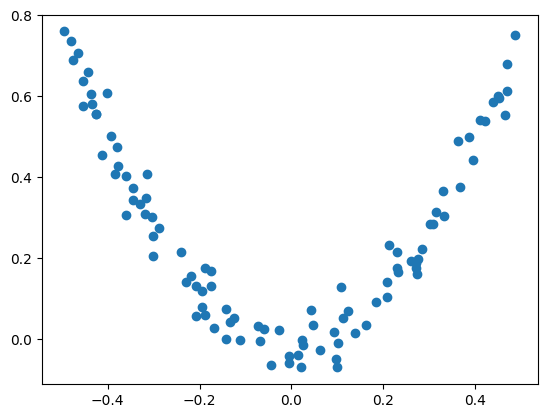

In [3]:
plt.scatter(X, y)

In [4]:
df = pd.DataFrame()
df['X'] = X.ravel()
df['y'] = y
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


### MODEL 1

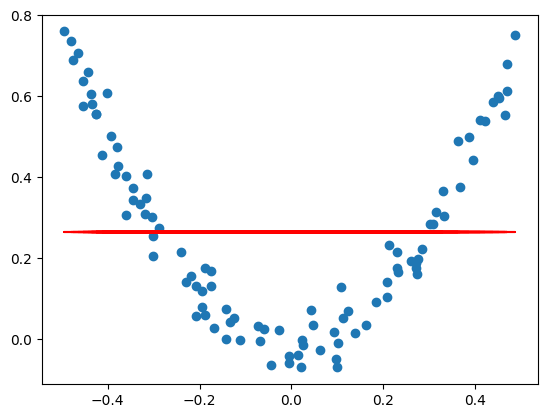

In [5]:
# prediction of model 1 - mean(y)
df['pred1'] = np.mean(df['y'])
plt.plot(df['X'], df['pred1'], c='red')
plt.scatter(df['X'], df['y'])

In [6]:
# pseudo residual of model 1 - (y - y_pred) 
df['res1'] = df['y'] - df['pred1']     
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


### MODEL 2

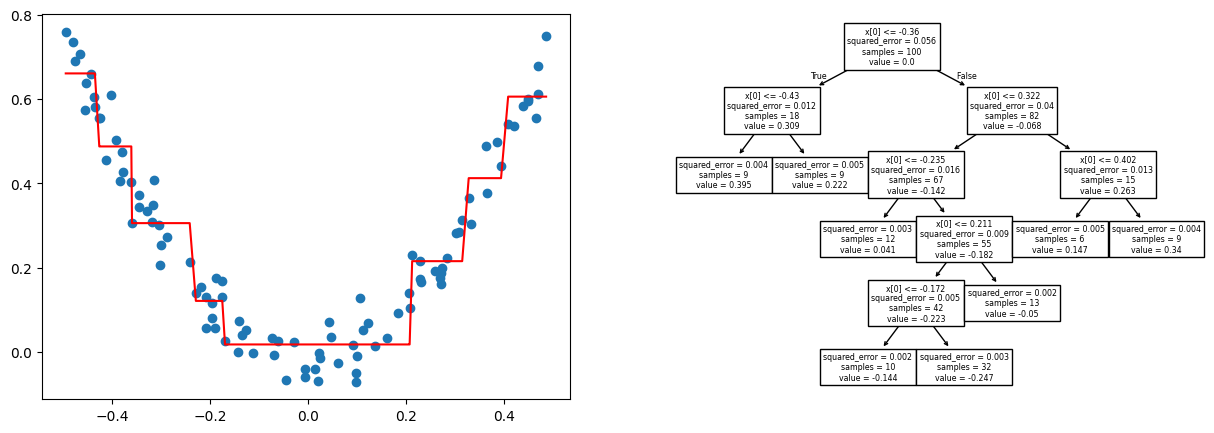

In [7]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

m2 = DecisionTreeRegressor(max_leaf_nodes=8)

# train decision tree on X,y as input and residual of m1 as output - m2 will predict residual from m1 using X,y
m2.fit(df[['X']], df['res1'])
df['pred2'] = m2.predict(df[['X']])
df['y_pred_final_m2'] = df['pred1'] + df['pred2']    # final pred = predicition of m1 + m2

# plotting 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
temp = df.sort_values('X')    # for plotting properly
ax[0].plot(temp['X'], temp['y_pred_final_m2'], c='red')
ax[0].scatter(df['X'], df['y'])
plot_tree(m2)
plt.show()

In [8]:
df

,X,y,pred1,res1,pred2,y_pred_final_m2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,0.018320
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.605884
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,0.018320
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.305965
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,0.018320
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,0.018320
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,0.018320
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.660912


### MODEL 3

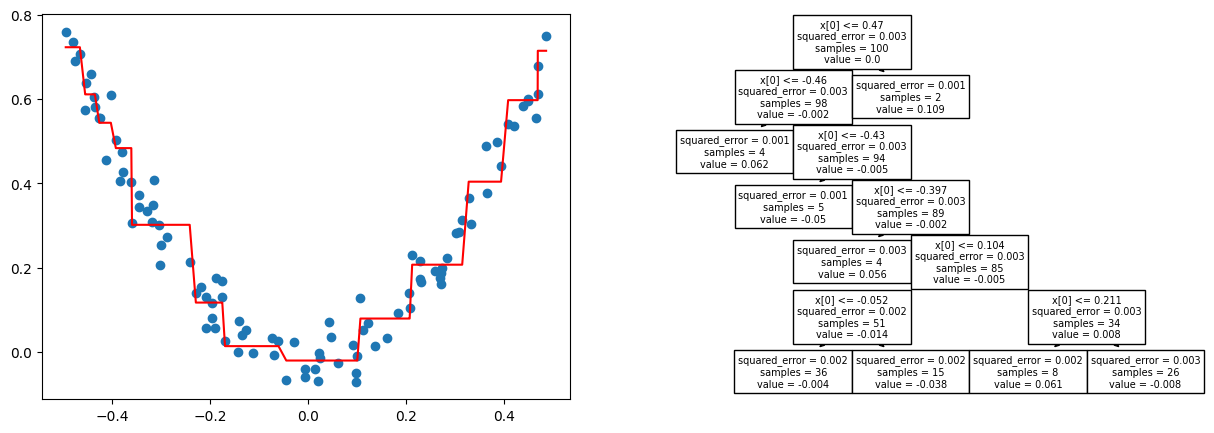

In [9]:
# pseudo resudual of m2 - (y - y_pred_final_m2)
df['res2'] = df['y'] - df['y_pred_final_m2']

m3 = DecisionTreeRegressor(max_leaf_nodes=8)

# train decision tree on X,y as input and residual of m2 as output - m3 will predict residual from m2 using X,y
m3.fit(df[['X']], df['res2'])
df['pred3'] = m3.predict(df[['X']])
df['y_pred_final_m3'] = df['y_pred_final_m2'] + df['pred3']    # final pred = predicition of m3 + (m1+m2)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
temp = df.sort_values('X')  
ax[0].plot(temp['X'], temp['y_pred_final_m3'], c='red')
ax[0].scatter(df['X'], df['y'])
plot_tree(m3)
plt.show()

### MODEL 4

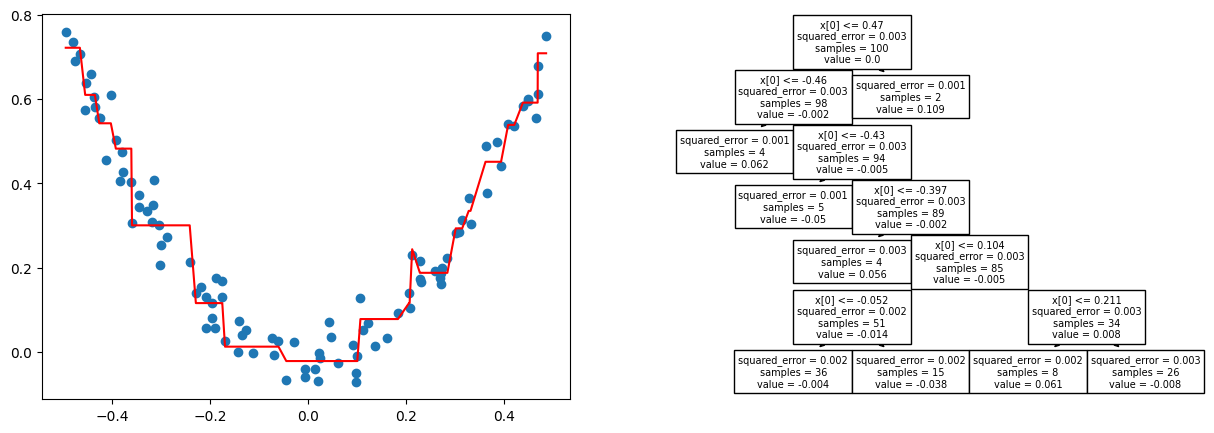

In [10]:
# pseudo resudual of m3
df['res3'] = df['y'] - df['y_pred_final_m3']

m4 = DecisionTreeRegressor(max_leaf_nodes=8)

m4.fit(df[['X']], df['res3'])
df['pred4'] = m4.predict(df[['X']])
df['y_pred_final_m4'] = df['y_pred_final_m3'] + df['pred4']    # final pred = predicition of m4 + (m1+m2+m3)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
temp = df.sort_values('X')    
ax[0].plot(temp['X'], temp['y_pred_final_m4'], c='red')
ax[0].scatter(df['X'], df['y'])
plot_tree(m3)
plt.show()

In [11]:
df

,X,y,pred1,res1,pred2,y_pred_final_m2,res2,pred3,y_pred_final_m3,res3,pred4,y_pred_final_m4
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,0.018320,0.033253,-0.003999,0.014321,0.037252,-0.001231,0.013090
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.605884,-0.011404,-0.008361,0.597523,-0.003043,-0.005914,0.591609
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,0.215784,-0.049732,-0.008361,0.207423,-0.041371,-0.019275,0.188148
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,0.018320,-0.088497,-0.038130,-0.019811,-0.050367,-0.001231,-0.021042
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.305965,0.038021,-0.003999,0.301966,0.042020,-0.001231,0.300735
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,0.018320,-0.058995,-0.038130,-0.019811,-0.020864,-0.001231,-0.021042
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,0.018320,-0.020624,-0.038130,-0.019811,0.017506,-0.001231,-0.021042
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,0.018320,0.014489,-0.003999,0.014321,0.018488,-0.001231,0.013090
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.660912,0.028603,0.062075,0.722987,-0.033472,-0.001231,0.721756
